# Aufgabe 3
## 2)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#import plotly.express as px

In [2]:
data = pd.read_csv('credit.csv')
datac=data[data['Balance'] > 0]
datac = datac.drop_duplicates()
datac.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
datac.shape

(310, 11)

In [4]:
data.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,45.077311,4762.036675,356.821516,2.963325,55.711491,13.459658,527.770171
std,35.153406,2302.846858,154.441276,1.367022,17.258555,3.109751,459.614599
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.011000,3098.000000,250.000000,2.000000,42.000000,11.000000,75.000000
50%,32.916000,4668.000000,344.000000,3.000000,56.000000,14.000000,474.000000
75%,57.337000,5884.000000,438.000000,4.000000,70.000000,16.000000,872.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [5]:
X = datac['Limit']
y = datac['Balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 69)

X_train.head()

112    6637
51     3969
90     5767
130    3821
14     3291
Name: Limit, dtype: int64

In [26]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     419.9
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           1.88e-52
Time:                        16:14:20   Log-Likelihood:                -1500.4
No. Observations:                 217   AIC:                             3005.
Df Residuals:                     215   BIC:                             3012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -184.3313     45.505     -4.051      0.0

### R²=0.66

C:\Users\georg\AppData\Local\Temp\ipykernel_14448\317894076.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(X_train, -184.3313 + 0.1562*X_train, 'r', label='Balance=-184.3313  + 0.1562*Limit', color='black')


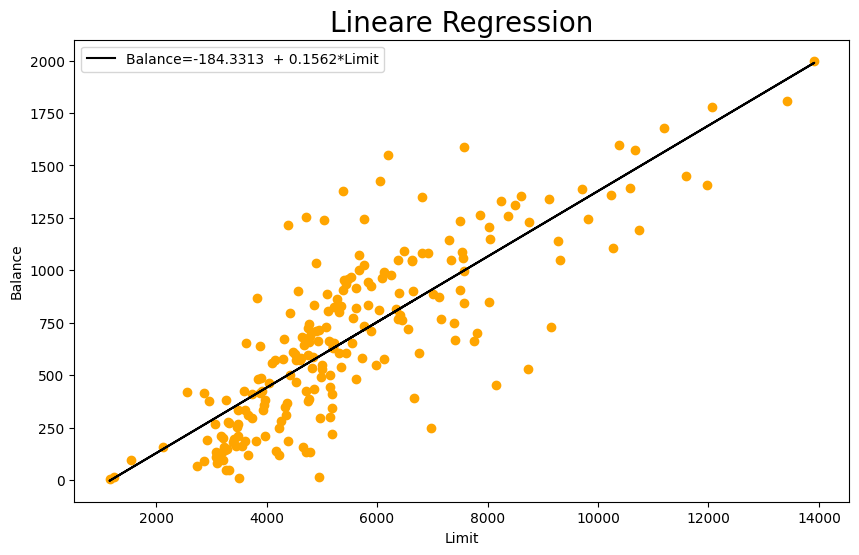

In [39]:
# Grafik mit Regressionsgerade
plt.figure(figsize = (10, 6))
plt.scatter(X_train, y_train, color='orange')
plt.plot(X_train, -184.3313 + 0.1562*X_train, 'r', label='Balance=-184.3313  + 0.1562*Limit', color='black')
plt.title('Lineare Regression', fontsize=20)
plt.xlabel('Limit')
plt.ylabel('Balance')
plt.legend()
plt.show()

## 3

In [8]:
datac.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


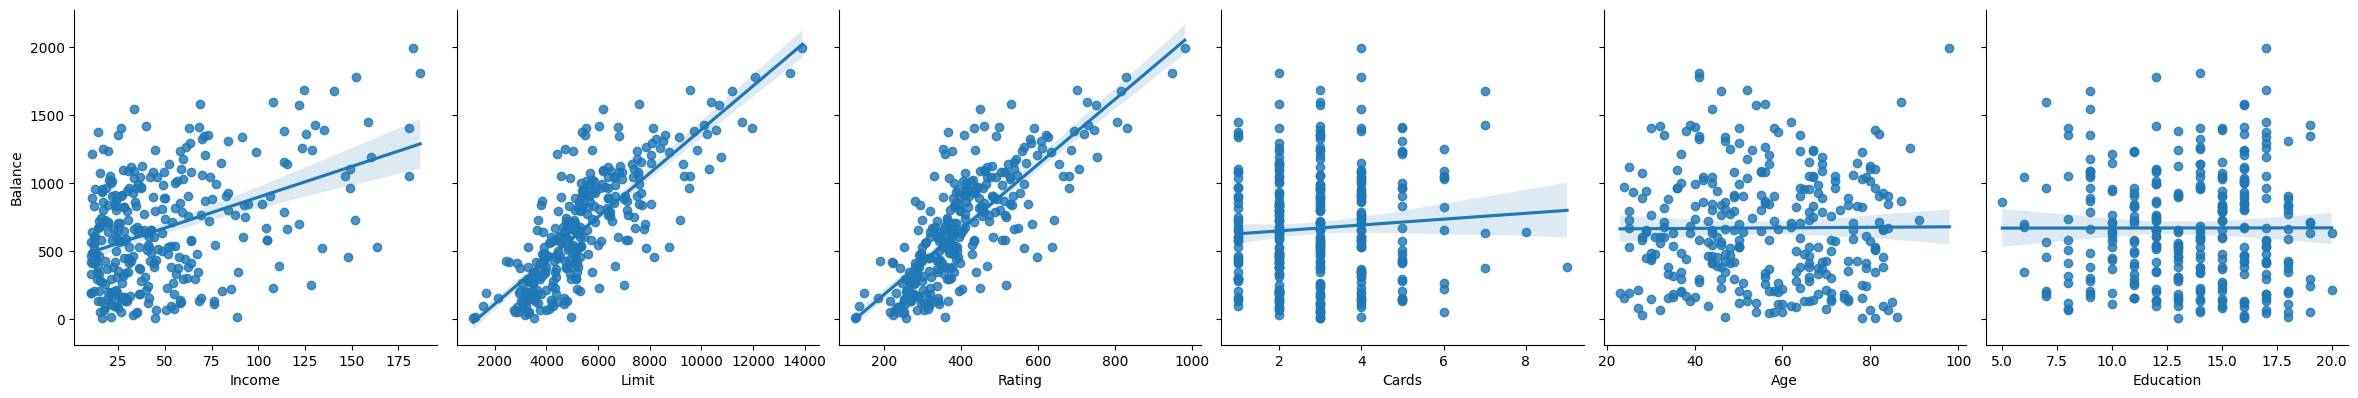

In [9]:
sns.pairplot(datac, x_vars=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education'], y_vars='Balance', height=4, aspect=1, kind='reg')
plt.show()

In [20]:
data2=datac
data2.replace('No', 0, inplace=True)
data2.replace('Yes', 1, inplace=True)
data2.replace(' Male', 0, inplace=True)
data2.replace('Female', 1, inplace=True)
data2.replace('Caucasian', 0, inplace=True)
data2.replace('Asian', 1, inplace=True)
data2.replace('African American', 2, inplace=True)
data2['Ethnicity'].unique()
# data2.head()

array([0, 1, 2])

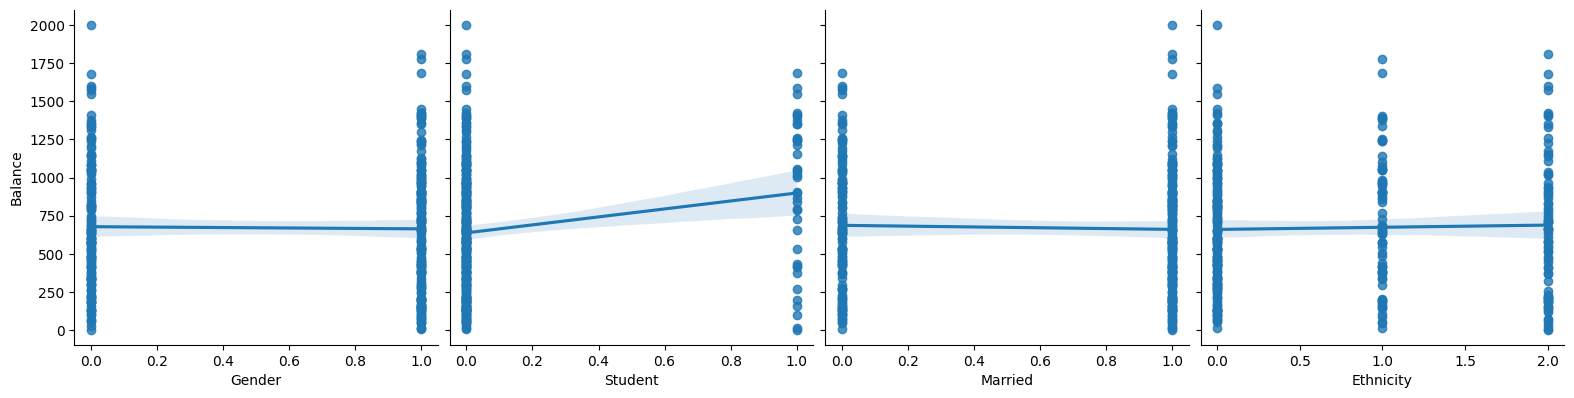

In [21]:
sns.pairplot(datac, x_vars=['Gender','Student','Married','Ethnicity'], y_vars='Balance', height=4, aspect=1, kind='reg')
plt.show()

hat halt gar nichts gebracht 

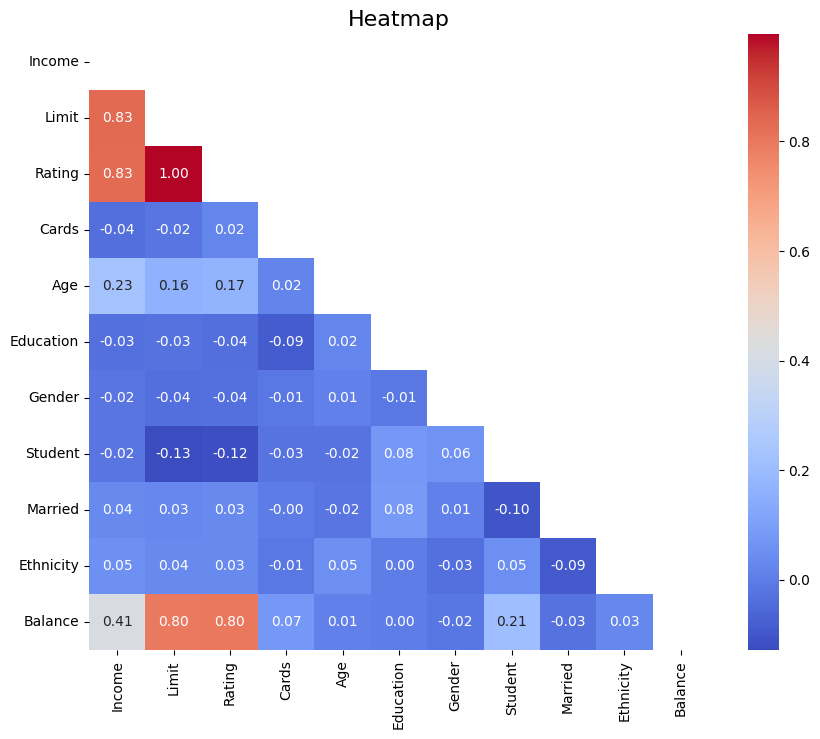

In [23]:
mask = np.triu(np.ones_like(data2.corr(), dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(data2.corr(), annot=True, fmt=".2f", mask=mask, cmap="coolwarm")
plt.title("Heatmap", fontsize=16)
plt.show()